In [22]:
# Read Principal Component Analysis (PCA)
# This data contains twelve chemical idetifiers for over 6000 wines and a label as either 'red' or 'white'
# Conert the X-data to numpy array. Drop 'quality' column which is subjective label from wine tasters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_wine=pd.read_csv("../wine-labeled.csv")

df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [23]:
# 1. Convert the X-data to a numpy array. Drop the \quality" column, which is a
    # subjective label from wine tasters. 
df_wine=df_wine.drop(["quality"], axis="columns")

def red_wine(x):
    if x =='red':
        return 0
    else:
        return 1

# Convert the Red/White column to a an array of 1's and 0's.
#df_wine["type"].apply(lambda x: "1" if x=='red' else '0')

df_wine["type"]= np.array([red_wine(x) for x in df_wine["type"]])
df_wine.head(-10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.80,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.80,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.80,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6482,4.9,0.47,0.17,1.9,0.035,60.0,148.0,0.98964,3.27,0.35,11.50,1
6483,6.5,0.33,0.38,8.3,0.048,68.0,174.0,0.99492,3.14,0.50,9.60,1
6484,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.55,1
6485,6.2,0.21,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,1


In [35]:
# conver the X-data to a numpy array
x_val= np.array(df_wine.loc[:,"fixed acidity":'alcohol'])
y_val=np.array(df_wine["type"])

In [36]:
# EASIER method to get PCA components
from sklearn.decomposition import PCA

In [37]:
pca= PCA(n_components=5)
pca.fit(x_val)
pca.components_

array([[-7.40796441e-03, -1.18432899e-03,  4.86869305e-04,
         4.10197175e-02, -1.68198717e-04,  2.30481781e-01,
         9.72166826e-01,  1.77233905e-06, -6.55520548e-04,
        -7.04338632e-04, -5.45173684e-03],
       [-5.36562393e-03, -7.84498565e-04, -2.47947037e-04,
         1.86364316e-02,  6.72674387e-05,  9.72658270e-01,
        -2.31409676e-01,  1.32996637e-06,  6.47986887e-04,
         3.46357533e-04,  2.85017390e-03],
       [ 2.37980377e-02,  8.84101767e-04,  1.92869419e-03,
         9.95274105e-01,  1.73019914e-04, -2.72149098e-02,
        -3.58290013e-02,  4.60408843e-04, -6.91161807e-03,
        -1.93529116e-03, -8.23558184e-02],
       [ 8.57756781e-01,  1.71342614e-02,  3.53280563e-02,
        -6.23231011e-02,  9.19466873e-03,  8.47350928e-03,
         4.31640540e-03,  1.41804609e-03, -3.53876123e-02,
         2.70799224e-02, -5.06621053e-01],
       [ 5.07838342e-01, -1.53591509e-02,  4.34990985e-02,
         5.87771145e-02, -6.57467616e-03,  6.06766412e-04,
  

In [38]:
# Calcualate the Explained Variance Ratio
pca.explained_variance_ratio_

array([9.53758252e-01, 4.06277547e-02, 4.82625097e-03, 4.63879237e-04,
       3.01694672e-04])

In [43]:
# determine the TOP 2 principal components as a new array P
P= pca.transform(x_val)[:,:2]

In [44]:
# PERFORM your FAVORITE CLASSIFICATION method (KNN or logistic Regression) on P
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
model=LR()
#SPLIT the data sets into TRAIN and TEST
# here, y_val is the type of red WINE

xtrain, xtest, ytrain, ytest= train_test_split(P, y_val, test_size=0.25)
# create model to fit train data sets
model.fit(xtrain, ytrain)
ypredict=model.predict(xtest)

# get the accuracy score
accuracy_score(ytest, ypredict)

0.92

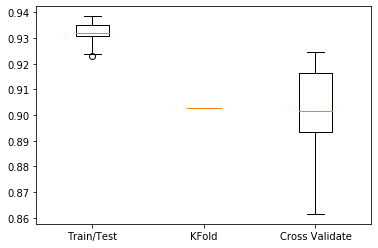

In [51]:
# USING Multiple accuracies to calculate an accuracy
t_acc=[]

# using 10 TRAIN data sets 
def log_wine(x, y, a):
    xtrain, xtest, ytrain, ytest= train_test_split(x,y)
    model=LR()
    model.fit(xtrain, ytrain)
    ypredict=model.predict(xtest)
    
    acc=accuracy_score(ytest, ypredict)
    return acc


for i in range(10):
    t_acc.append(log_wine(P,y_val, model))

# run k fold with 10 splits on KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score


kf= KFold(n_splits= 10)
KNN= KNeighborsClassifier(n_neighbors=4)
tr_ts_acc=[]

for train_index, test_index in kf.split(P):
    x_train, x_test= P[train_index], P[test_index]
    y_train, y_test= y_val[train_index], y_val[train_index]
    
    KNN.fit(xtrain, ytrain)
    ypredict=KNN.predict(xtest)
    
    tr_ts_acc.append(accuracy_score(ytest, ypredict))
    
# run corss validation with 10 split 

KNN_4= KNeighborsClassifier(n_neighbors= 4)

cross_accuracies= list(cross_val_score(KNN_4, P, y_val, scoring='accuracy', cv=10))

plt.boxplot([t_acc, tr_ts_acc, cross_accuracies])
plt.xticks([1,2,3], ['Train/Test', 'KFold', 'Cross Validate'])
plt.show()

    